<hr style='border:double 5px'>

# [ 타이타닉 데이터 설명 ]
* 주요 feature - Pclass, Age, SibSp, Parch, Fare
* 예측 target label - Survived<br>

컬럼 정보 확인하기

* PassengerId : 승객 번호
* Survived : 생존여부(1: 생존, 0 : 사망)
* Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
* Name : 승객 이름
* Sex : 승객 성별
* Age : 승객 나이
* SibSp : 동반한 형제자매, 배우자 수
* Patch : 동반한 부모, 자식 수
* Ticket : 티켓의 고유 넘버
* Fare : 티켓의 요금(탑승료)
* Cabin : 객실 번호
* Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

## 1. csv 데이타 파일 읽어오기

In [245]:
import numpy as np
import pandas as pd

In [246]:
df = pd.read_csv('data/movielens-1m/train.csv', encoding = 'utf-8')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 데이터프레임 구조 확인

In [247]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [249]:
df.shape

(891, 12)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
df.columns # 칼럼 리스트

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [253]:
len(df.columns) # 칼럼 갯수

12

## 3. 데이터프레임의 전체 컬럼 및 결측값(NaN) 존재 컬럼 확인

In [254]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [255]:
df.isnull().sum() # 빈값 하나당 1 Age - NaN 177, Cabin - NaN 687 ...

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [256]:
len(df[df['Age'].isnull()])

177

In [257]:
len(df[df['Cabin'].isnull()])

687

In [258]:
len(df[df['Embarked'].isnull()])

2

##  4. 결측값(NaN) 처리하기
* 'Age' 컬럼의 결측값(NaN)을 평균값으로 대체하기
* 'Cabin' 결측값 NaN 을 공백으로 교체하기

In [259]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()

In [260]:
len(df[df['Age'].isnull()])

0

In [261]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = ' '

In [262]:
len(df[df['Cabin'].isnull()])

0

## 5. 전체 생존률 구하기
* (생존자수/전체승객인원)*100

In [263]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [264]:
(df['Survived'].sum() / df['PassengerId'].count()) *100

38.38383838383838

## 6. 각 객실 등급별 분포 수 알아보기
* 객실 등급별 승객수 확인

In [265]:
pclass_count =[]

for x in df['Pclass'].unique():
    pclass_count.append([x , df.loc[df['Pclass'] ==x, 'PassengerId']])

In [266]:
for (x, y) in pclass_count :
    print('등급 :', x,', 인원 :',  y.count())

등급 : 3 , 인원 : 491
등급 : 1 , 인원 : 216
등급 : 2 , 인원 : 184


## 7. 1등칸 / 2등칸 / 3등칸 객실 승객의 생존자 수와 비율

In [267]:
survived_count=[]
for x in df['Pclass'].unique():
    survived_count.append([x , df.loc[df['Pclass'] ==x, 'Survived']])

In [268]:
survived_count

[[3, 0      0
  2      1
  4      0
  5      0
  7      0
        ..
  882    0
  884    0
  885    0
  888    0
  890    0
  Name: Survived, Length: 491, dtype: int64], [1, 1      1
  3      1
  6      0
  11     1
  23     1
        ..
  871    1
  872    0
  879    1
  887    1
  889    1
  Name: Survived, Length: 216, dtype: int64], [2, 9      1
  15     1
  17     1
  20     0
  21     1
        ..
  866    1
  874    1
  880    1
  883    0
  886    0
  Name: Survived, Length: 184, dtype: int64]]

In [269]:
for (x, y) in survived_count :
    print('등급 :', x,', 생존인원 :',  y.sum(),'. 비율 :', y.sum()/y.count()*100)

등급 : 3 , 생존인원 : 119 . 비율 : 24.236252545824847
등급 : 1 , 생존인원 : 136 . 비율 : 62.96296296296296
등급 : 2 , 생존인원 : 87 . 비율 : 47.28260869565217


## 8. 남자와 여자의 생존률 구하기

In [270]:
gender_survived_count =[]
for x in df['Sex'].unique():
    gender_survived_count.append([x, df.loc[df['Sex'] ==x, 'Survived']])

In [271]:
gender_survived_count

[['male', 0      0
  4      0
  5      0
  6      0
  7      0
        ..
  883    0
  884    0
  886    0
  889    1
  890    0
  Name: Survived, Length: 577, dtype: int64], ['female', 1      1
  2      1
  3      1
  8      1
  9      1
        ..
  880    1
  882    0
  885    0
  887    1
  888    0
  Name: Survived, Length: 314, dtype: int64]]

In [272]:
for (x, y) in gender_survived_count :
    print('성별 :', x,', 생존인원 :',  y.sum(),'. 생존비율 :', y.sum()/y.count()*100)

성별 : male , 생존인원 : 109 . 생존비율 : 18.890814558058924
성별 : female , 생존인원 : 233 . 생존비율 : 74.20382165605095


## 9. 3등칸 객실 남자 승객의 생존자 수와 비율 알아보기

In [273]:
threegradedf = df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'male')]
survived = threegradedf.loc[threegradedf['Survived'] ==1, 'PassengerId'].count()
total = threegradedf['PassengerId'].count()

print('생존자수 :', survived, '생존 비율 :', survived/total*100)

생존자수 : 47 생존 비율 : 13.544668587896252


## 10. 탑승한 곳에 따른 생존률 구하기

In [274]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = '탑승위치 누락'

In [275]:
enbarked_survived_count=[]
for x in df['Embarked'].unique() :
    enbarked_survived_count.append([x, df.loc[df['Embarked'] ==x, 'Survived']])


In [276]:
enbarked_survived_count

[['S', 0      0
  2      1
  3      1
  4      0
  6      0
        ..
  883    0
  884    0
  886    0
  887    1
  888    0
  Name: Survived, Length: 644, dtype: int64], ['C', 1      1
  9      1
  19     1
  26     0
  30     0
        ..
  866    1
  874    1
  875    1
  879    1
  889    1
  Name: Survived, Length: 168, dtype: int64], ['Q', 5      0
  16     0
  22     1
  28     1
  32     1
        ..
  790    0
  825    0
  828    1
  885    0
  890    0
  Name: Survived, Length: 77, dtype: int64], ['탑승위치 누락', 61     1
  829    1
  Name: Survived, dtype: int64]]

In [277]:
for (x, y) in enbarked_survived_count :
    print('탑승 :', x,', 생존인원 :',  y.sum(),'. 생존비율 :', y.sum()/y.count() *100)

탑승 : S , 생존인원 : 217 . 생존비율 : 33.69565217391305
탑승 : C , 생존인원 : 93 . 생존비율 : 55.35714285714286
탑승 : Q , 생존인원 : 30 . 생존비율 : 38.961038961038966
탑승 : 탑승위치 누락 , 생존인원 : 2 . 생존비율 : 100.0


## 총평

모든 사람 중 38%의 사람이 생존하였다.<br>
1등칸에 탑승한 승객은 216명 중 136명이 생존, 62%의 생존률을 보였고,<br>
2등칸에 탑승한 승객은 184명 중 87명이 생존, 47%의 생존률을 보였으며<br>
3등칸에 탑승한 승객은 491명 중 119명이 생존, 24%의 생존률을 보였다.<br>
<br>
1등칸의 생존률이 확연히 높았으며, 타이타닉의 A갑판, B갑판 즉 최상위층에 위치했음이 생존률의 요인이 된 듯 하다.<br>
그에반해 3등칸은 F갑판에 주로 위치해 생존률이 24%에 불과했음<br>
출처 : <link>https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89#%EC%B8%B5%EB%B3%84_%EA%B5%AC%EC%A1%B0</link><br>

남자와 여자의 생존률이 매우 차이가 났는데<br>
남자는 18%, 여자는 74%였다.<br>
영국의 사우샘프턴에서 미국의 뉴욕으로 향하는 배라 영국인이 다수 탔고,
신사도 정신으로 여성을 보호하려는 영국인 정신으로 구명보트를 여자에게 양보한 남자가 많아 여자의 생존률이 높았다고 생각됨<br>

이러한 두가지 요인으로 인해 3등칸이며 남자인 승객은 생존 비율이 13%에 불과했다.<br>

승선한 항구명에 따라서도 생존 비율이 달랐는데,<br>
Cherbourg, Queenstown, Southampton 항구에서 승객들이 탑승했다.<br>
경로는 Southampton => Cherbourg => Queenstown 순이였고<br>
출처 : <link>https://m.blog.naver.com/PostView.nhn?blogId=geo7319&logNo=40137045318&proxyReferer=https%3A%2F%2Fwww.google.com%2F</link>
<br>
두번째, Cherbourg에서 탑승했던 승객들의 생존비율이 55%로 가장 높았다.

<hr style='border:double 5px'>

<hr style="border: double 2px;">

# 시각화 전단계 및 열 정제

In [278]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


## 열 정제후 corr재확인

## 여자 => 1 남자 => 0

In [279]:
df.loc[df['Sex'] == 'male','Sex'] = 0
df.loc[df['Sex'] == 'female','Sex'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,,S


## C=> Embarked_C = True

In [280]:
df['Embarked_C'] = df['Embarked'] =='C'
df['Embarked_S'] = df['Embarked'] =='S'
df['Embarked_Q'] = df['Embarked'] =='Q'

In [281]:
pivotdf = pd.pivot_table(data=df, index="Fare", values="Survived")

## Pclass ==1 , Fare == 0  ::  Pclass ==1 .mean()

In [282]:
df.loc[(df["Pclass"] == 1)& (df["Fare"] ==0),"Fare"] = round(df.loc[(df["Pclass"] == 1),"Fare"].mean())
df.loc[(df["Pclass"] == 2)& (df["Fare"] ==0),"Fare"] = round(df.loc[(df["Pclass"] == 2),"Fare"].mean())
df.loc[(df["Pclass"] == 3)& (df["Fare"] ==0),"Fare"] = round(df.loc[(df["Pclass"] == 3),"Fare"].mean())

In [283]:
pivotdf

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


In [284]:
df.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,True,False,False
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,C,True,False,False
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,,C,True,False,False
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,C23 C25 C27,S,False,True,False
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,0,3,"Holm, Mr. John Fredrik Alexander",0,43.0,0,0,C 7075,6.4500,,S,False,True,False
843,844,0,3,"Lemberopolous, Mr. Peter L",0,34.5,0,0,2683,6.4375,,C,True,False,False
326,327,0,3,"Nysveen, Mr. Johan Hansen",0,61.0,0,0,345364,6.2375,,S,False,True,False
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S,False,True,False


In [285]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.021040,-0.001205,0.022148,-0.033606
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.247246,0.168240,-0.155660,0.003650
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.564429,-0.243292,0.081720,0.221009
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.172316,0.082853,-0.125722,0.074115
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.095901,0.032024,-0.027121,-0.013855
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.153212,-0.059528,0.070941,-0.026354
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.209804,-0.011069,0.063036,-0.081228
Fare,0.021040,0.247246,-0.564429,0.172316,0.095901,0.153212,0.209804,1.000000,0.262805,-0.158195,-0.121413
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.262805,1.000000,-0.778359,-0.148258
Embarked_S,0.022148,-0.155660,0.081720,-0.125722,-0.027121,0.070941,0.063036,-0.158195,-0.778359,1.000000,-0.496624


## import, font set

In [286]:
import matplotlib.pyplot as plt
# 매직 커멘드 : 해당 파일에 그래프를 그려라 (inline)
%matplotlib inline 

# 마이너스 기호가 깨지는 현상 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 지원하게하기
f_path = "C:/Windows/Fonts/malgun.ttf" 
# f_path = "/Libary/Fonts/AppliGothic.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name() 
rc('font', family=font_name)## 시각화 전단계 및 열 정제

In [287]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,,S,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,,S,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,,S,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,True,False,False


<hr style="border: double 2px;">

# 시각화

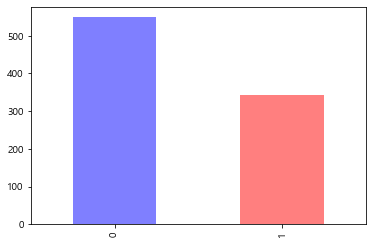

In [288]:
# kind = 모양, color= blue, red, alphe=투명도
df['Survived'].value_counts().plot(kind='bar', color=['b','r'], alpha=0.5)

## 각 등급별 승객수(sort)

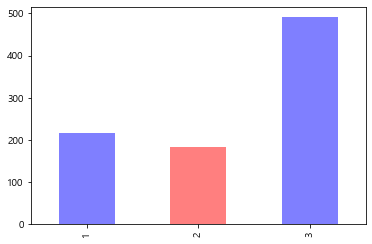

In [289]:
# 등급별로 sort후 시각화
df['Pclass'].value_counts().sort_index().plot(kind='bar', color=['b','r'], alpha=0.5)

## 나이별 승객수

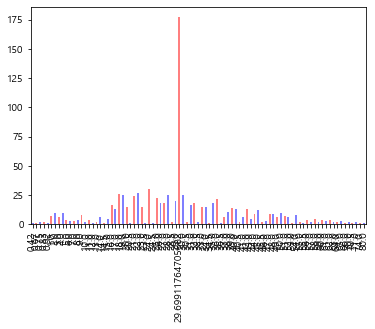

In [290]:
df['Age'].value_counts().sort_index().plot(kind='bar', color=['b','r'], alpha=0.5)
# 난잡 xxxxx => 범위잡기 or 그래프 다르게

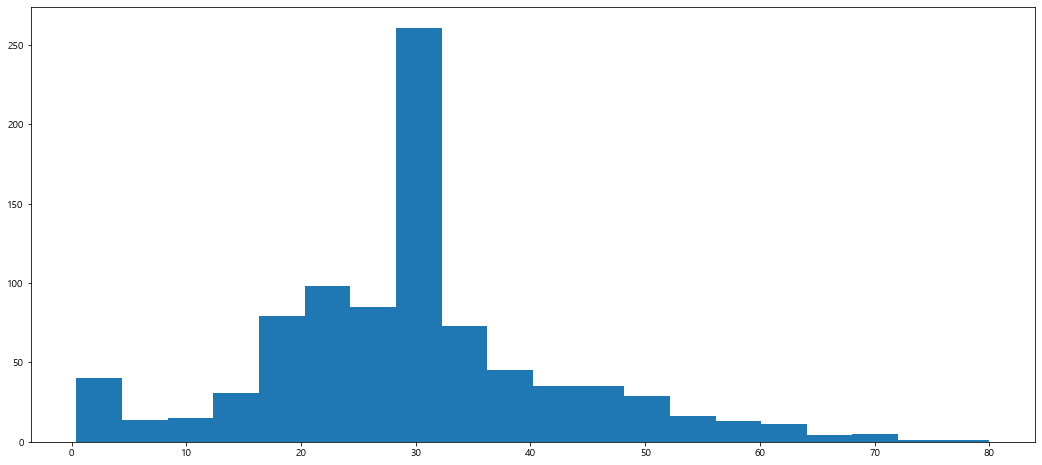

In [291]:
# 히스토그램
df['Age'].hist(bins=20, figsize=(18,8), grid=False); # bins=빈도, figsize= 그래프 크기, grid = 그리드 켜기/끄기

## 1등칸에 탄 사람의 Survived 현황을 bar로 표현

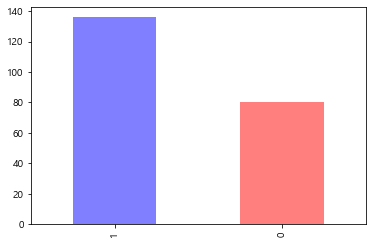

In [292]:
df.loc[df['Pclass'] ==1, 'Survived'].value_counts().plot(kind='bar', color=['b','r'], alpha=0.5)

In [293]:
df[df['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

## 1등칸의 남자 생존률, 2등칸의 남자 생존률, 3등칸의 남자 생존률

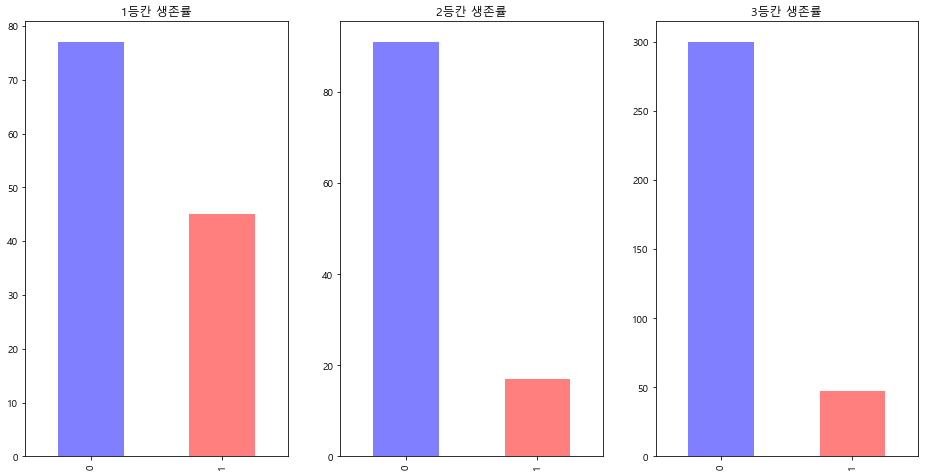

In [294]:
(f, ax) = plt.subplots(1, 3, figsize=(16, 8))
df[(df['Pclass'] ==1) & (df['Sex']==0)]['Survived'].value_counts().plot(kind='bar',ax=ax[0], color=['b','r'], alpha=0.5)
df.loc[(df['Pclass'] ==2) & (df['Sex']==0), 'Survived'].value_counts().plot(kind='bar',ax=ax[1], color=['b','r'], alpha=0.5)
df.loc[(df['Pclass'] ==3) & (df['Sex']==0), 'Survived'].value_counts().plot(kind='bar',ax=ax[2], color=['b','r'], alpha=0.5)

ax[0].set_title('1등칸 생존률')
ax[1].set_title('2등칸 생존률')
ax[2].set_title('3등칸 생존률')
plt.show()

<hr style="border: double 2px;">

# 좀더 이쁘고 다양한 그래프 제공 (seaborn)

In [295]:
import seaborn as sns

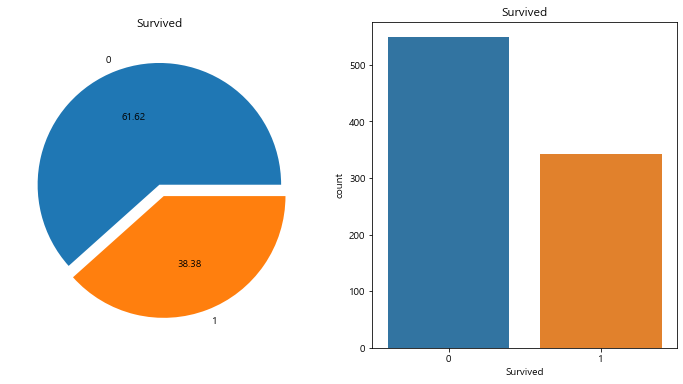

In [296]:
(f,ax)= plt.subplots(1,2, figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f', ax=ax[0], explode=[0, 0.1])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## group by

In [297]:
df.groupby('Pclass').mean() # group by

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
Pclass,,,,,,,,,,
1,461.597222,0.629630,0.435185,37.048118,0.416667,0.356481,86.099132,0.393519,0.587963,0.009259
2,445.956522,0.472826,0.413043,29.866958,0.402174,0.380435,21.346966,0.092391,0.891304,0.016304
3,439.154786,0.242363,0.293279,26.403259,0.615071,0.393075,13.789603,0.134420,0.718941,0.146640


## 상관관계 그래프

In [298]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.021040,-0.001205,0.022148,-0.033606
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.247246,0.168240,-0.155660,0.003650
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.564429,-0.243292,0.081720,0.221009
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.172316,0.082853,-0.125722,0.074115
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.095901,0.032024,-0.027121,-0.013855
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.153212,-0.059528,0.070941,-0.026354
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.209804,-0.011069,0.063036,-0.081228
Fare,0.021040,0.247246,-0.564429,0.172316,0.095901,0.153212,0.209804,1.000000,0.262805,-0.158195,-0.121413
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.262805,1.000000,-0.778359,-0.148258
Embarked_S,0.022148,-0.155660,0.081720,-0.125722,-0.027121,0.070941,0.063036,-0.158195,-0.778359,1.000000,-0.496624


Text(0.5, 1, 'feature 상관관계')

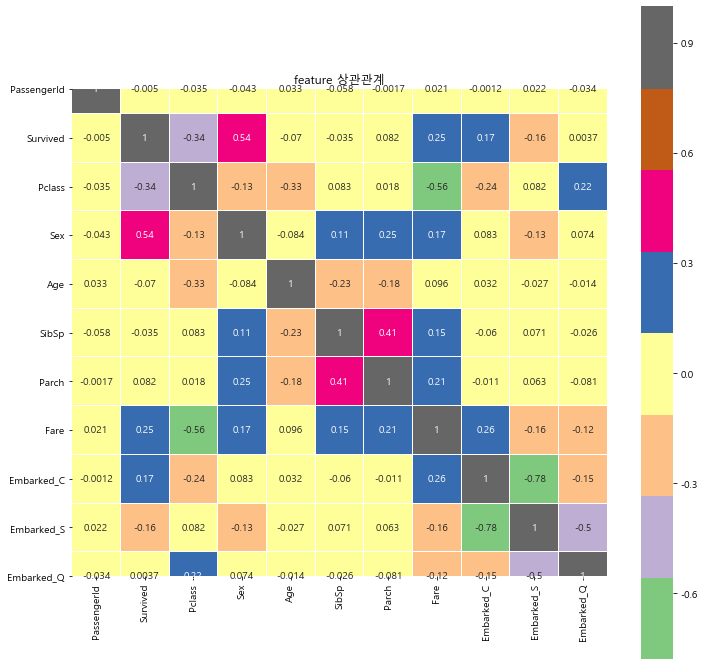

In [299]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.Accent, linecolor='white')
plt.title('feature 상관관계')

## cut함수 : 범위설정

In [300]:
# pandas.cut(칼럼, 범위 list, labels=listcount-1)
df['Age_cat'] = pd.cut(df['Age'], bins=[0, 3, 7, 15, 30, 60, 100], labels=['baby','children','teenager','young','adult','old'])

In [301]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,,S,False,True,False,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,,S,False,True,False,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,True,False,adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,,S,False,True,False,adult


In [302]:
df['Age_cat'].value_counts()

young       503
adult       283
teenager     33
baby         30
old          22
children     20
Name: Age_cat, dtype: int64

## group by => mean

In [303]:
df.groupby('Age_cat').mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q
Age_cat,,,,,,,,,,,
baby,396.700000,0.666667,2.533333,0.400000,1.672333,1.733333,1.366667,33.364307,0.200000,0.766667,0.033333
children,466.700000,0.700000,2.650000,0.600000,4.950000,1.750000,1.350000,27.905830,0.100000,0.800000,0.100000
teenager,442.060606,0.454545,2.696970,0.575758,11.500000,1.727273,1.121212,35.217430,0.303030,0.636364,0.060606
young,435.242545,0.335984,2.487078,0.333996,25.527324,0.429423,0.234592,26.594614,0.186879,0.693837,0.119284
adult,470.388693,0.420495,1.954064,0.353357,41.132509,0.363958,0.392226,43.418625,0.187279,0.773852,0.035336
old,432.545455,0.227273,1.590909,0.136364,66.022727,0.136364,0.272727,41.371214,0.136364,0.727273,0.090909


## Hue를 이용해 두가지 범주로 데이터 확인

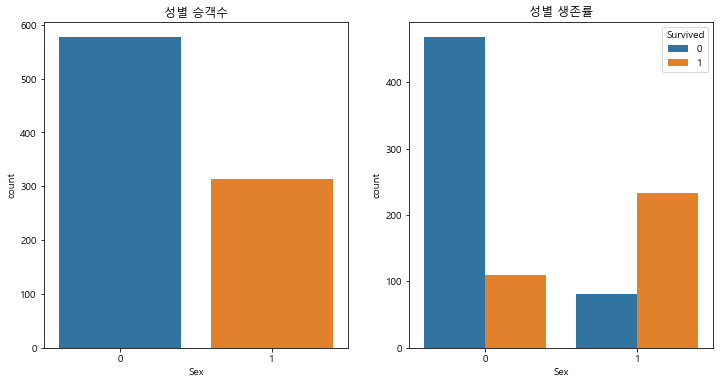

In [304]:
(f, ax) = plt.subplots(1,2, figsize=(12,6))

sns.countplot('Sex', data=df, ax=ax[0])
ax[0].set_title('성별 승객수')

sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('성별 생존률')
plt.show()

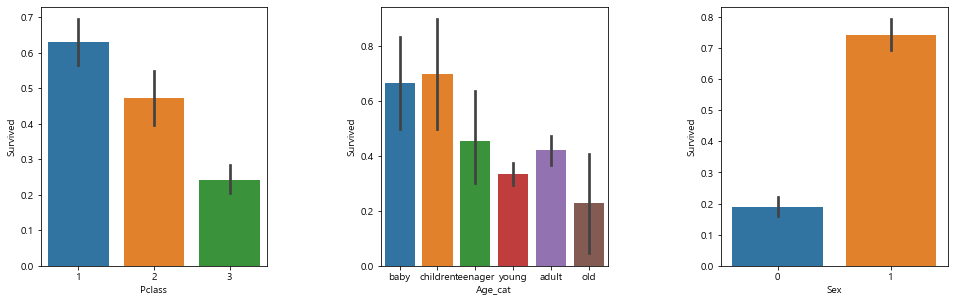

In [305]:
plt.figure(figsize=[14, 4])
plt.subplot(131) # 1행 3열의 1번째
sns.barplot('Pclass','Survived',data=df) # barplot(칼럼명, 값, 데이터프레임)
plt.subplot(132) # 1행 3열의 2번째
sns.barplot('Age_cat','Survived',data=df)
plt.subplot(133) # 1행 3열의 3번째
sns.barplot('Sex','Survived',data=df)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()
# 검은 작은 줄 (오차범위) : min, max

In [306]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.879853
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.688108
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## 이름을 이용해 데이터 분석

In [318]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,,S,False,True,False,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,True,False,False,adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,,S,False,True,False,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,False,True,False,adult
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,,S,False,True,False,adult
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,,Q,False,False,True,young
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S,False,True,False,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,,S,False,True,False,baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,,S,False,True,False,young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,,C,True,False,False,teenager


### 이름내의 호칭 가져오기

In [309]:
df.loc[0, 'Name']

'Braund, Mr. Owen Harris'

In [317]:
df.loc[0, 'Name'].split(',')[1].split('.')[0].strip()

'Mr'